# INF552 HW-4  Zhifeng Liu 2912549136

# 1. The LASSO and Boosting for Regression

In [244]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer

(a) Download and open the Communities and Crime data
(b) Use a data imputation technique to deal with the missing values in the data set, and ignore the nonpredictive features

In [245]:
data = pd.read_csv('communities.data.txt', header=None, na_values=["?"])
data_ignor = data.iloc[:, 5:]
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
data_imp = imp.fit_transform(data_ignor)
dataset = pd.DataFrame(data_imp)
columns = []
names = open("./communities.names.txt","r")
for line in names.readlines():
    if (line.startswith("@attribute")):
        words = line.split(" ")
        columns.append(words[1])
attri = columns[5: ]
dataset = pd.DataFrame(data_imp, columns=attri)
print(dataset)

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
5           0.02           0.28          0.06          0.54          1.00   
6           0.01           0.39          0.00          0.98          0.06   
7           0.01           0.74          0.03          0.46          0.20   
8           0.03           0.34          0.20          0.84          0.02   
9           0.01           0.40          0.06          0.87          0.30   
10          0.13           0.71          0.15          0.07          1.00   
11          0.02           0.46          0.08          0.91          0.07   

(c) Plot a correlation matrix for the features in the data set

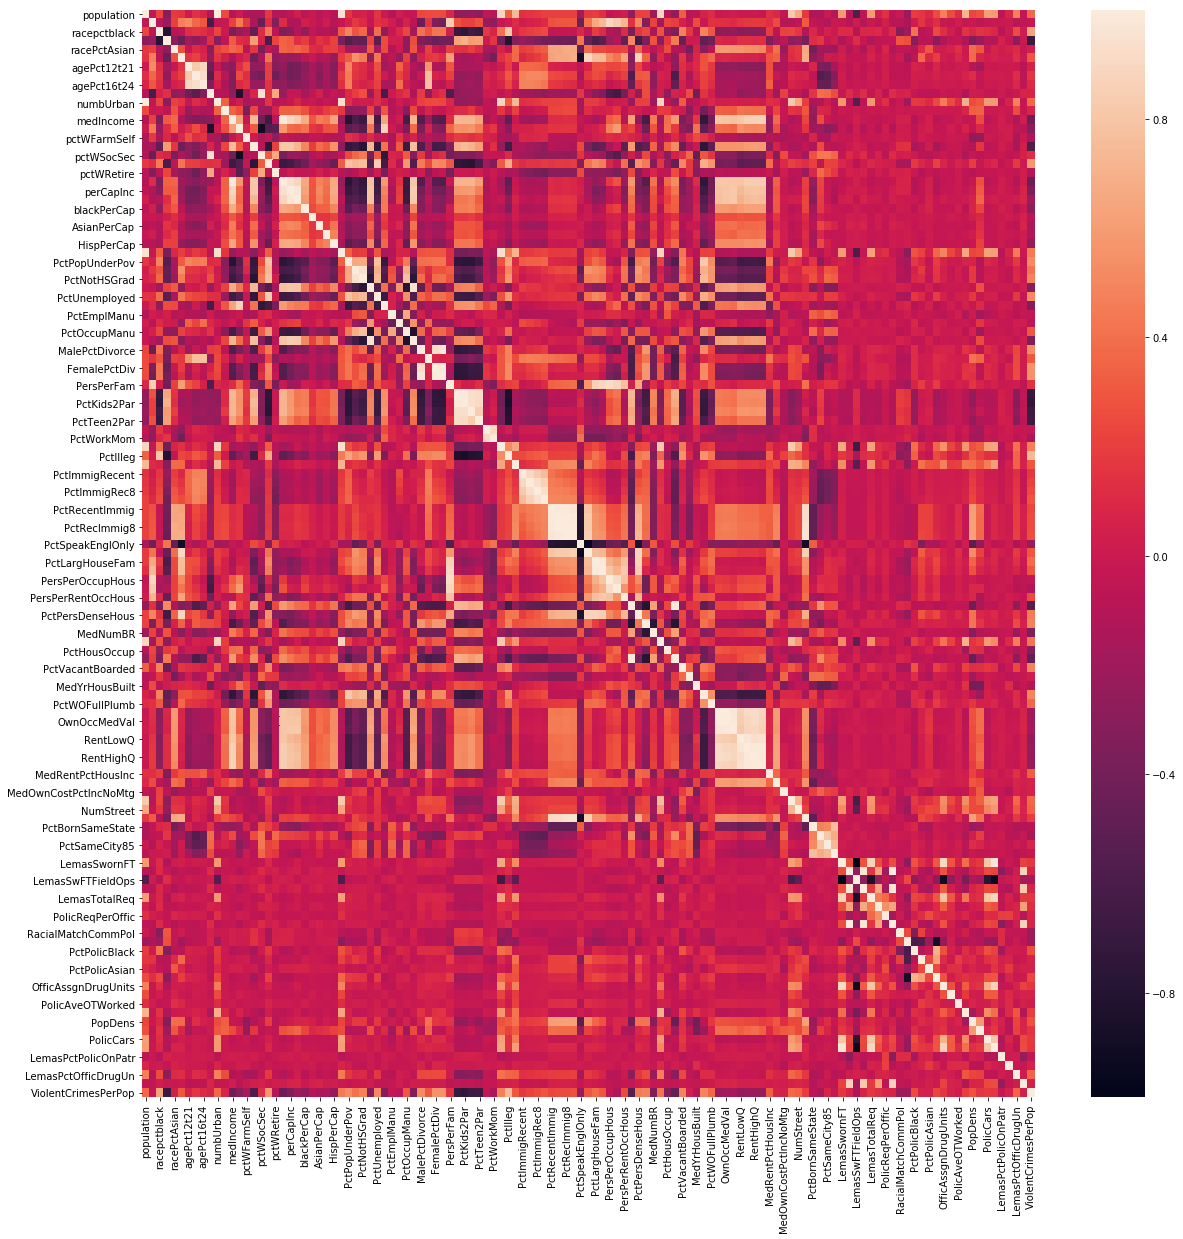

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(dataset.corr())

(d) Calculate the Coefficient of Variation CV for each feature.

In [246]:
CV = np.var(dataset)/np.mean(dataset)
print(CV)

population              0.279497
householdsize           0.057812
racepctblack            0.357407
racePctWhite            0.078976
racePctAsian            0.283756
racePctHisp             0.375118
agePct12t21             0.056748
agePct12t29             0.041712
agePct16t24             0.082405
agePct65up              0.075837
numbUrban               0.256607
pctUrban                0.284024
medIncome               0.121318
pctWWage                0.059912
pctWFarmSelf            0.142810
pctWInvInc              0.063938
pctWSocSec              0.063949
pctWPubAsst             0.155202
pctWRetire              0.058557
medFamInc               0.104574
perCapInc               0.104223
whitePerCap             0.094765
blackPerCap             0.101098
indianPerCap            0.133349
AsianPerCap             0.118397
OtherPerCap             0.128002
HispPerCap              0.086729
NumUnderPov             0.294752
PctPopUnderPov          0.172179
PctLess9thGrade         0.144073
          

(e) Pick 11 features with highest CV , and make scatter plots and box plots for them.

['LemasPctOfficDrugUn' 'NumStreet' 'racePctHisp' 'NumInShelters'
 'racepctblack' 'NumIlleg' 'PctUsePubTrans' 'PctNotSpeakEnglWell'
 'PctRecImmig5' 'PctRecentImmig' 'PctRecImmig8']


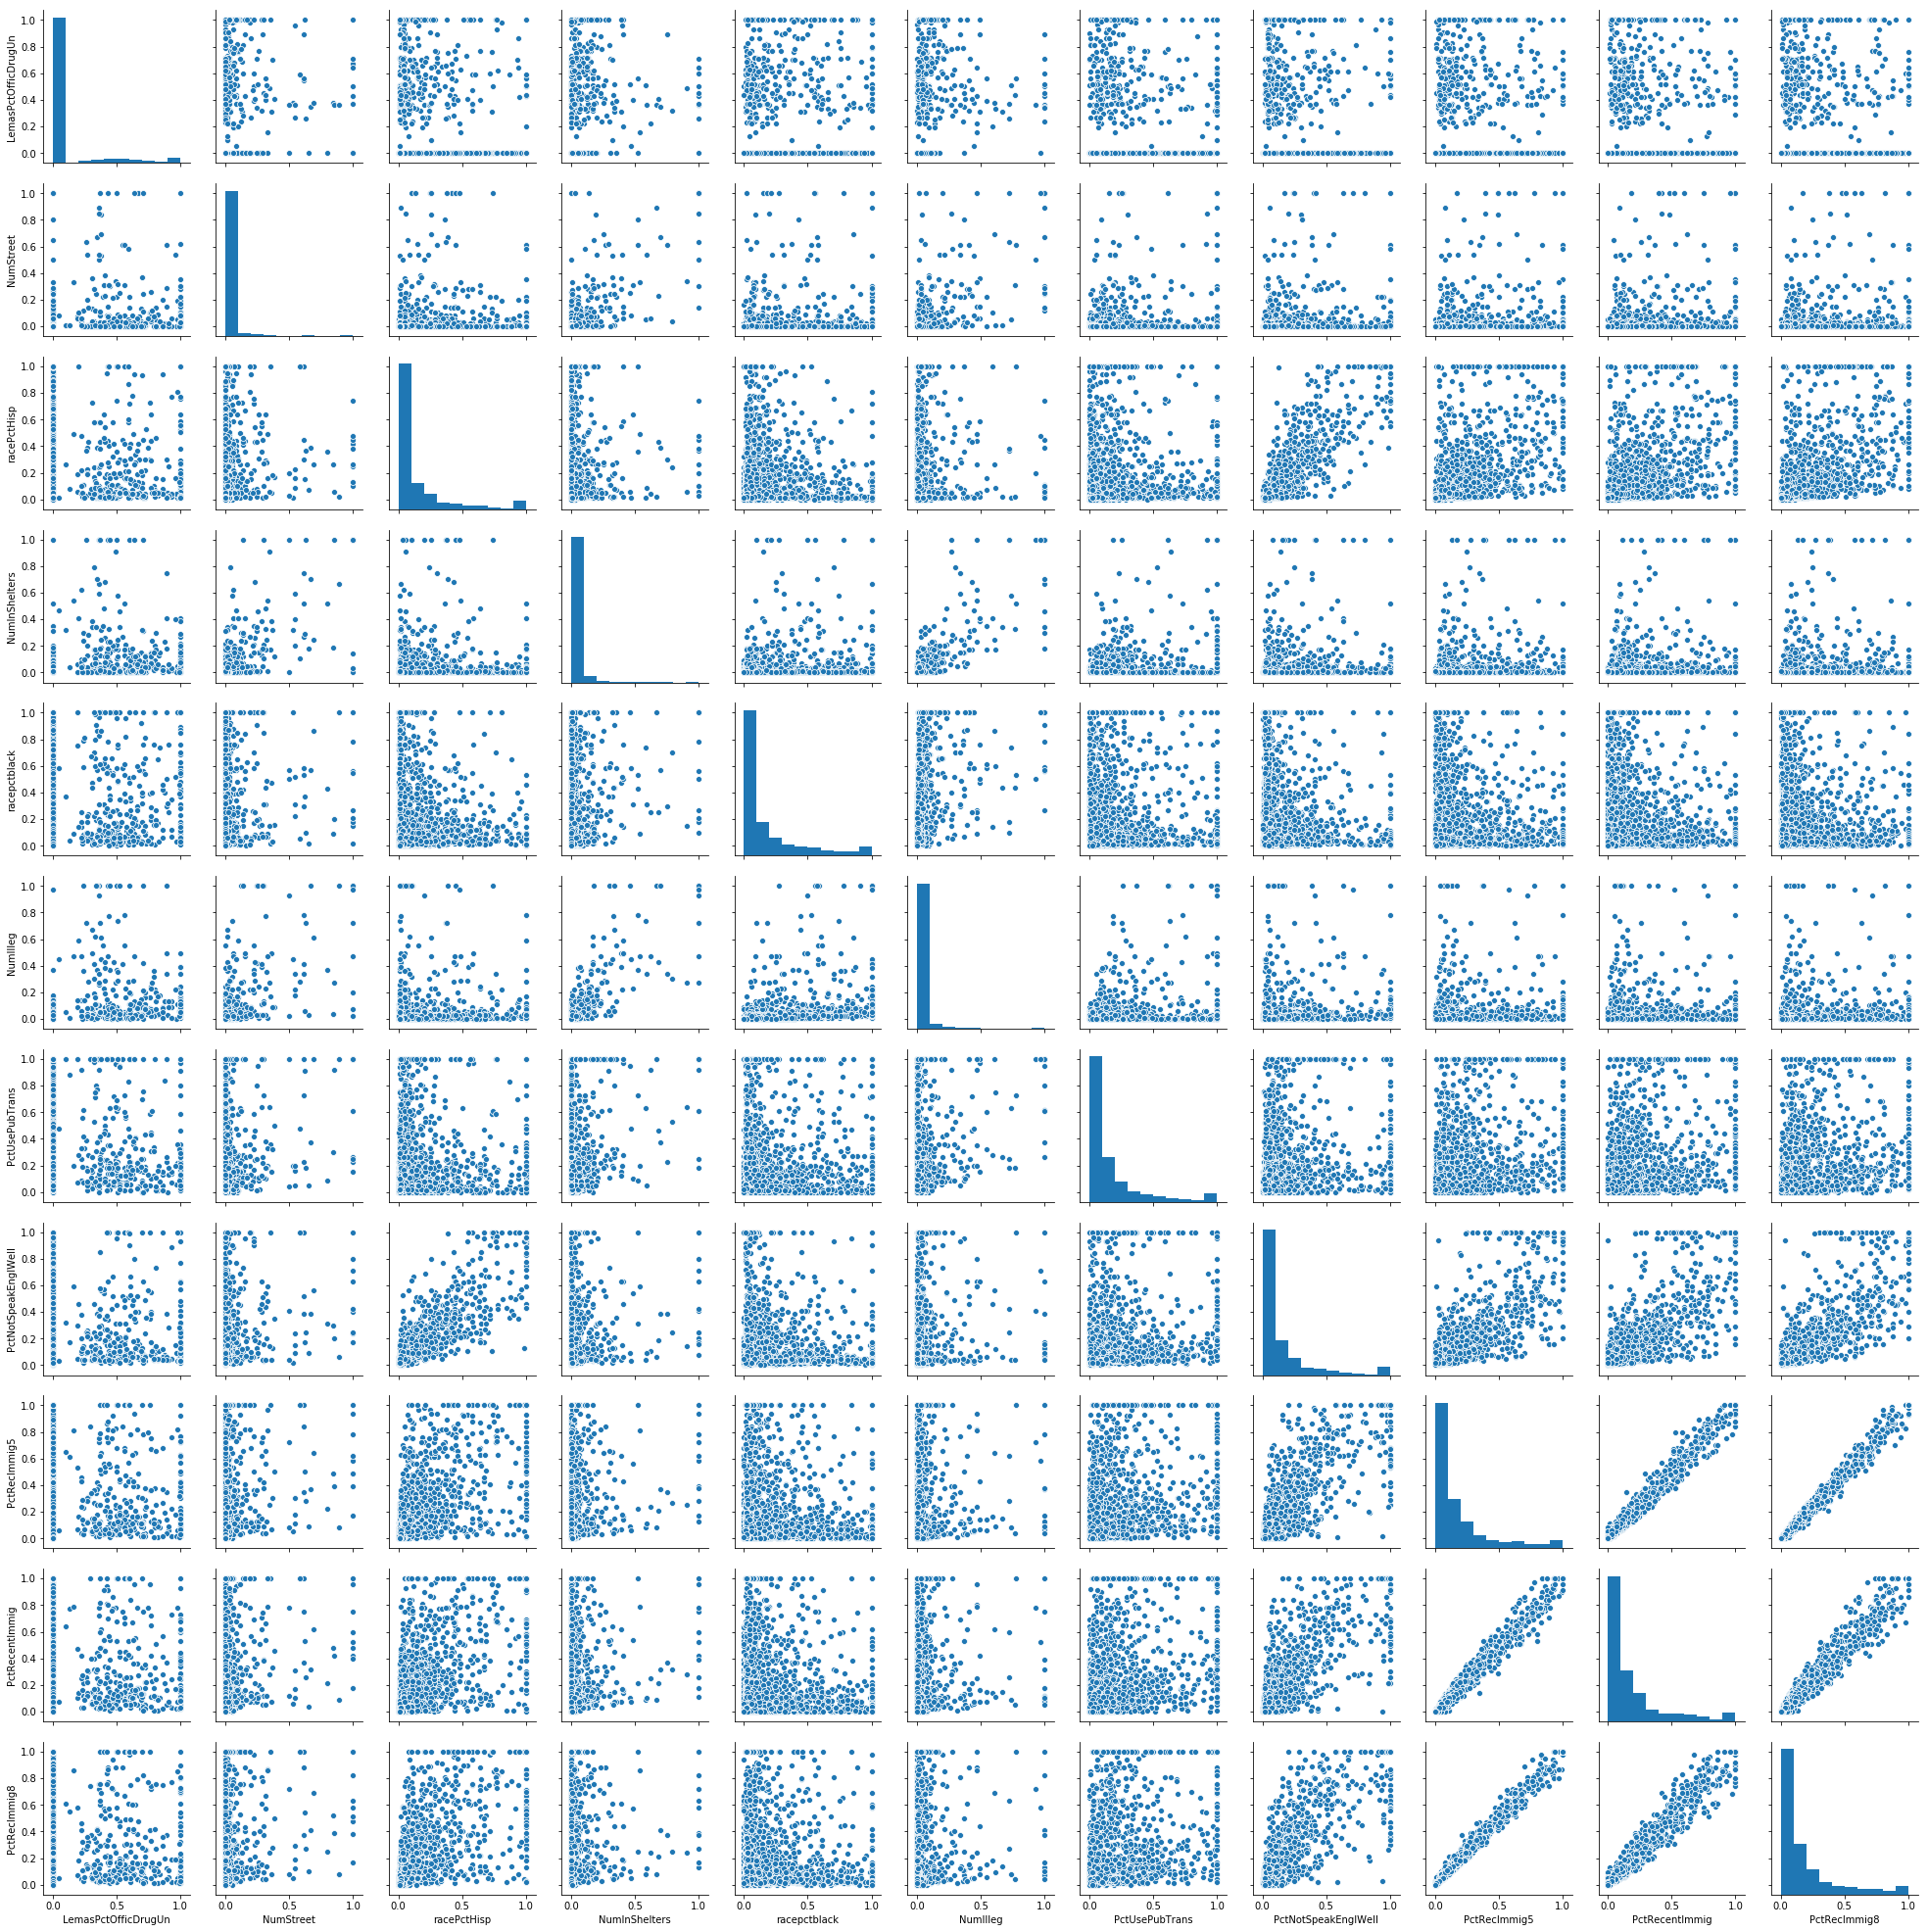

In [66]:
top_CV = CV.sort_values(ascending=False).head(11)
top_CV_index =top_CV.index.values
sns.pairplot(dataset[top_CV_index])

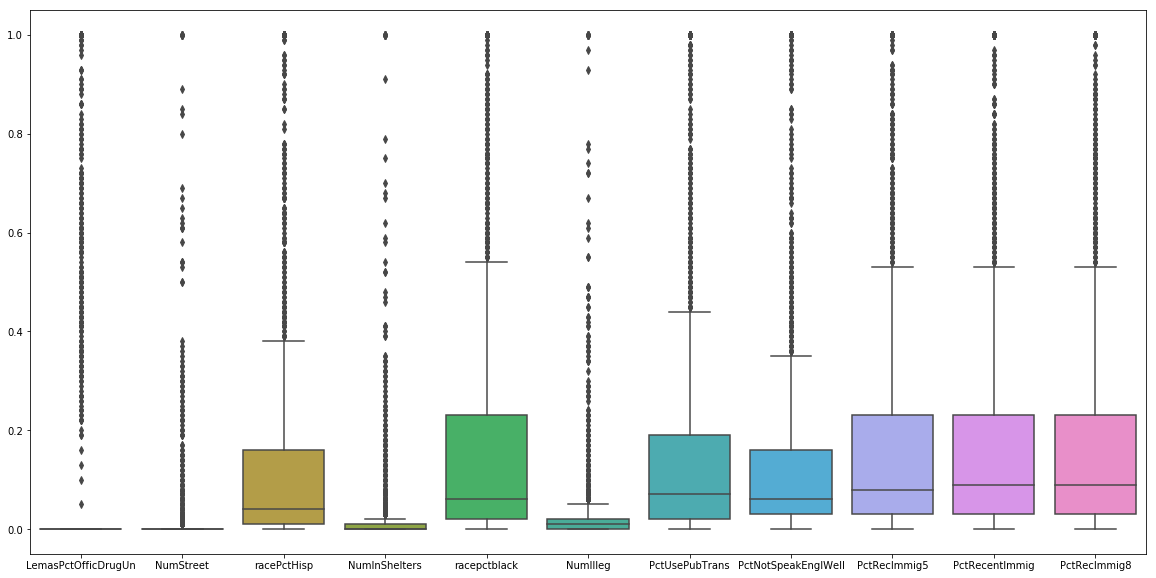

In [75]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=dataset[top_CV_index], orient="v")

(f) Fit a linear model using least squares to the training set and report the test error.

In [248]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
train_x = dataset.head(1495).iloc[:, :-1]
train_y = dataset.head(1495).iloc[:, -1]
test_x = dataset.iloc[1495:].iloc[:, :-1]
test_y = dataset.iloc[1495:].iloc[:, -1]
linear_model = LinearRegression()
linear_model.fit(train_x,train_y)
pred_y = linear_model.predict(test_x)
linear_err = mean_squared_error(test_y,pred_y)
print('Linear regression test error:', linear_err)

Linear regression test error: 0.7897255274315229


(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [249]:
from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV()
ridge_model.fit(train_x,train_y)
pred_y = ridge_model.predict(test_x)
ridge_err = mean_squared_error(test_y,pred_y)
print('Ridge regression test error:', ridge_err)

Ridge regression test error: 0.01773708110429478


(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

In [250]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV()
lasso_model.fit(train_x,train_y)
pred_y = lasso_model.predict(test_x)
lasso_err = mean_squared_error(test_y, pred_y)
print('Lasso model test error:', lasso_err)
attri_index = np.argwhere(lasso_model.coef_!=0)
n = 0
for each in attri_index:
    print(attri[each[0]])
    n = n+1
print('Number of Selected Variables:', n)

Lasso model test error: 0.01757149443833607
racepctblack
agePct12t29
pctUrban
pctWWage
pctWFarmSelf
pctWInvInc
pctWPubAsst
pctWRetire
blackPerCap
indianPerCap
AsianPerCap
OtherPerCap
HispPerCap
PctPopUnderPov
PctEmploy
MalePctDivorce
PctKids2Par
PctYoungKids2Par
PctTeen2Par
PctWorkMom
PctIlleg
PctImmigRec5
PctRecImmig10
PctPersOwnOccup
PctPersDenseHous
PctHousLess3BR
HousVacant
PctHousOccup
PctVacantBoarded
PctVacMore6Mos
MedYrHousBuilt
PctWOFullPlumb
RentLowQ
MedRent
MedRentPctHousInc
MedOwnCostPctIncNoMtg
NumStreet
PctForeignBorn
PctSameCity85
LemasTotReqPerPop
PolicReqPerOffic
PopDens
PctUsePubTrans
LemasPctPolicOnPatr
LemasGangUnitDeploy
LemasPctOfficDrugUn
Number of Selected Variables: 46


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [251]:
lasso_model2 = LassoCV(normalize=True)
lasso_model2.fit(train_x,train_y)
pred_y = lasso_model2.predict(test_x)
lasso_err = mean_squared_error(test_y, pred_y)
print('Lasso model test error:', lasso_err)
attri_index2 = np.argwhere(lasso_model2.coef_!=0)
n = 0
for each in attri_index2:
    print(attri[each[0]])
    n = n+1
print('Number of Selected Variables:', n)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Lasso model test error: 0.017509630716696294
racepctblack
racePctWhite
agePct12t29
pctUrban
pctWInvInc
pctWPubAsst
pctWRetire
indianPerCap
AsianPerCap
OtherPerCap
MalePctDivorce
PctKids2Par
PctYoungKids2Par
PctWorkMom
PctIlleg
PctPersDenseHous
PctHousLess3BR
HousVacant
PctHousOccup
PctVacantBoarded
PctVacMore6Mos
MedRentPctHousInc
MedOwnCostPctIncNoMtg
NumStreet
PctForeignBorn
PctSameCity85
LemasSwFTFieldPerPop
LemasTotReqPerPop
PolicReqPerOffic
OfficAssgnDrugUnits
LemasPctPolicOnPatr
LemasGangUnitDeploy
LemasPctOfficDrugUn
PolicBudgPerPop
Number of Selected Variables: 34


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


With normalized features, the test error is slightly smaller and the number of selected variables is smaller.

In [252]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
best_M = 0
best_score = 1
for m in np.arange(1, 123):
    pca = PCA(n_components=m)
    train_x_reduced = pca.fit_transform(scale(train_x))
    score = -1*cross_val_score(LinearRegression(), train_x_reduced, train_y, cv=10, 
                                 scoring='neg_mean_squared_error').mean()
    if score < best_score:
        best_score = score
        best_M = m    

In [253]:
pca = PCA(n_components=best_M)
test_x_reduced = pca.fit_transform(scale(test_x))
test_model = LinearRegression()
test_model.fit(test_x_reduced, test_y)
test_pred = test_model.predict(test_x_reduced)
test_err = mean_squared_error(test_y,test_pred)
print('The best M:', best_M)
print('When m=', best_M, ', the test MES is', test_err)

The best M: 95
When m= 95 , the test MES is 0.012625370894523938


(j) Fit a boosting tree to the data. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. You can use XGBoost3 to fit the model tree. Determine α (the regularization term) using cross-validation

In [254]:
from xgboost import XGBRegressor
alphas = [0.001,0.01,0.1,1]
best_a = 0
best_score = 1
for a in alphas:
    boost_model = XGBRegressor(reg_alpha=a)
    score = -1*cross_val_score(boost_model, train_x, train_y, cv=10, 
                                 scoring='neg_mean_squared_error').mean()
    if score < best_score:
        best_score = score
        best_a = a


In [118]:
test_model = XGBRegressor(reg_alpha=best_a)
test_model.fit(train_x, train_y)
test_pred = test_model.predict(test_x)
test_err = mean_squared_error(test_y,test_pred)
print('The selected alpha is', best_a)
print('The test MSE is', test_err)

The selected alpha is 0.001
The test MSE is 0.016247694969018206


# 2. Tree-Based Methods

(b) i.Use a data imputation technique to deal with the missing values in the data set.

In [255]:
data1 = pd.read_csv("aps_failure_training_set.csv", skiprows=20, na_values=["na"])
data2 = pd.read_csv("aps_failure_test_set.csv", skiprows=20, na_values=["na"])
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
data_imp1 = imp.fit_transform(data1.iloc[:,1:])
train_x2 = pd.DataFrame(data_imp1, columns=data1.columns[1:])
data_imp2 = imp.fit_transform(data2.iloc[:,1:])
test_x2 = pd.DataFrame(data_imp2, columns=data2.columns[1:])
train_y2 = data1.iloc[:,0:1]
test_y2 = data2.iloc[:,0:1]
traindata = pd.concat([train_y2, train_x2], axis=1)
testdata = pd.concat([test_y2, test_x2], axis=1)


(b) ii. For each of the 170 features, calculate the coefficient of variation CV = s/m,where s is sample variance and m is sample mean.

In [139]:
CV = np.var(train_x2)/np.mean(train_x2)
print(CV)

aa_000    3.564340e+05
ab_000    3.866449e+00
ac_000    1.676047e+09
ad_000    6.442860e+09
ae_000    3.667400e+03
af_000    3.832018e+03
ag_000    1.870950e+06
ag_001    1.185354e+06
ag_002    2.596281e+06
ag_003    6.476210e+06
ag_004    1.275251e+07
ag_005    9.496242e+06
ag_006    9.115663e+06
ag_007    4.008708e+06
ag_008    1.347326e+06
ag_009    5.564592e+06
ah_000    9.575935e+06
ai_000    2.925566e+06
aj_000    2.194217e+06
ak_000    5.440219e+06
al_000    4.868971e+06
am_0      7.654495e+06
an_000    1.734716e+07
ao_000    1.533703e+07
ap_000    9.397257e+06
aq_000    3.567222e+06
ar_000    5.835795e+01
as_000    9.464375e+05
at_000    2.791327e+06
au_000    1.071227e+06
              ...     
dl_000    3.924997e+07
dm_000    9.071820e+06
dn_000    2.775264e+05
do_000    1.256403e+05
dp_000    2.671538e+04
dq_000    2.002784e+09
dr_000    8.742238e+06
ds_000    4.615140e+05
dt_000    7.080036e+04
du_000    3.147095e+07
dv_000    6.974458e+06
dx_000    2.078945e+07
dy_000    4

(b) iii.Plot a correlation matrix for your feature

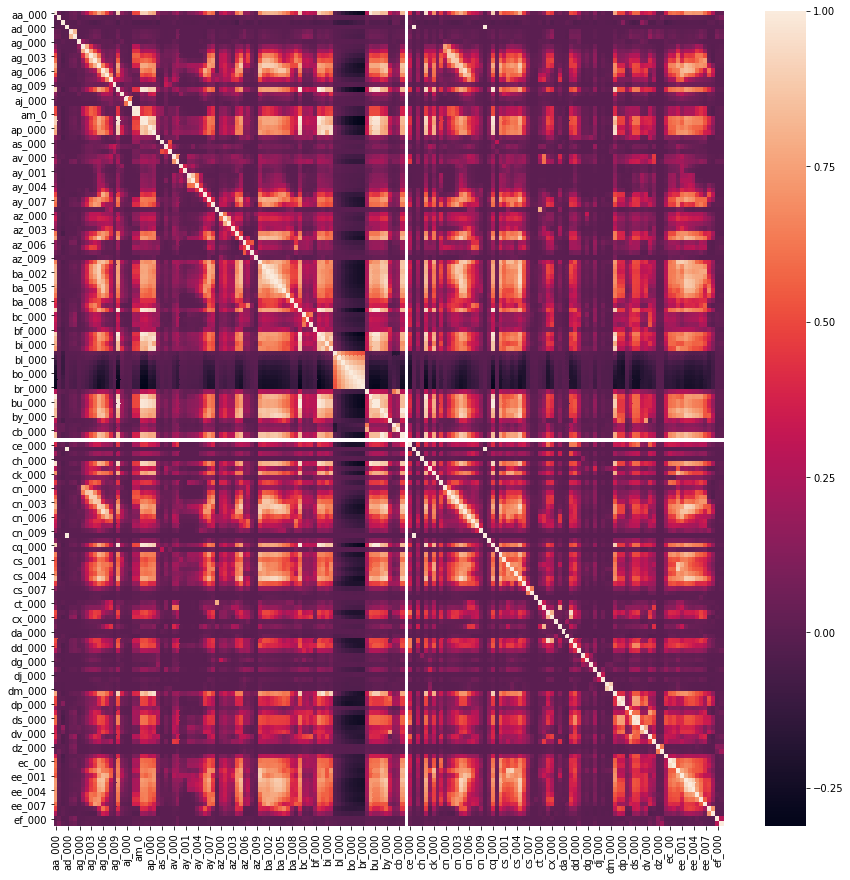

In [142]:
plt.figure(figsize=(15, 15))
sns.heatmap(train_x2.corr())

(b) iv.Pick ⌊ 170⌋ features with highest CV , and make scatter plots and box plots for them.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


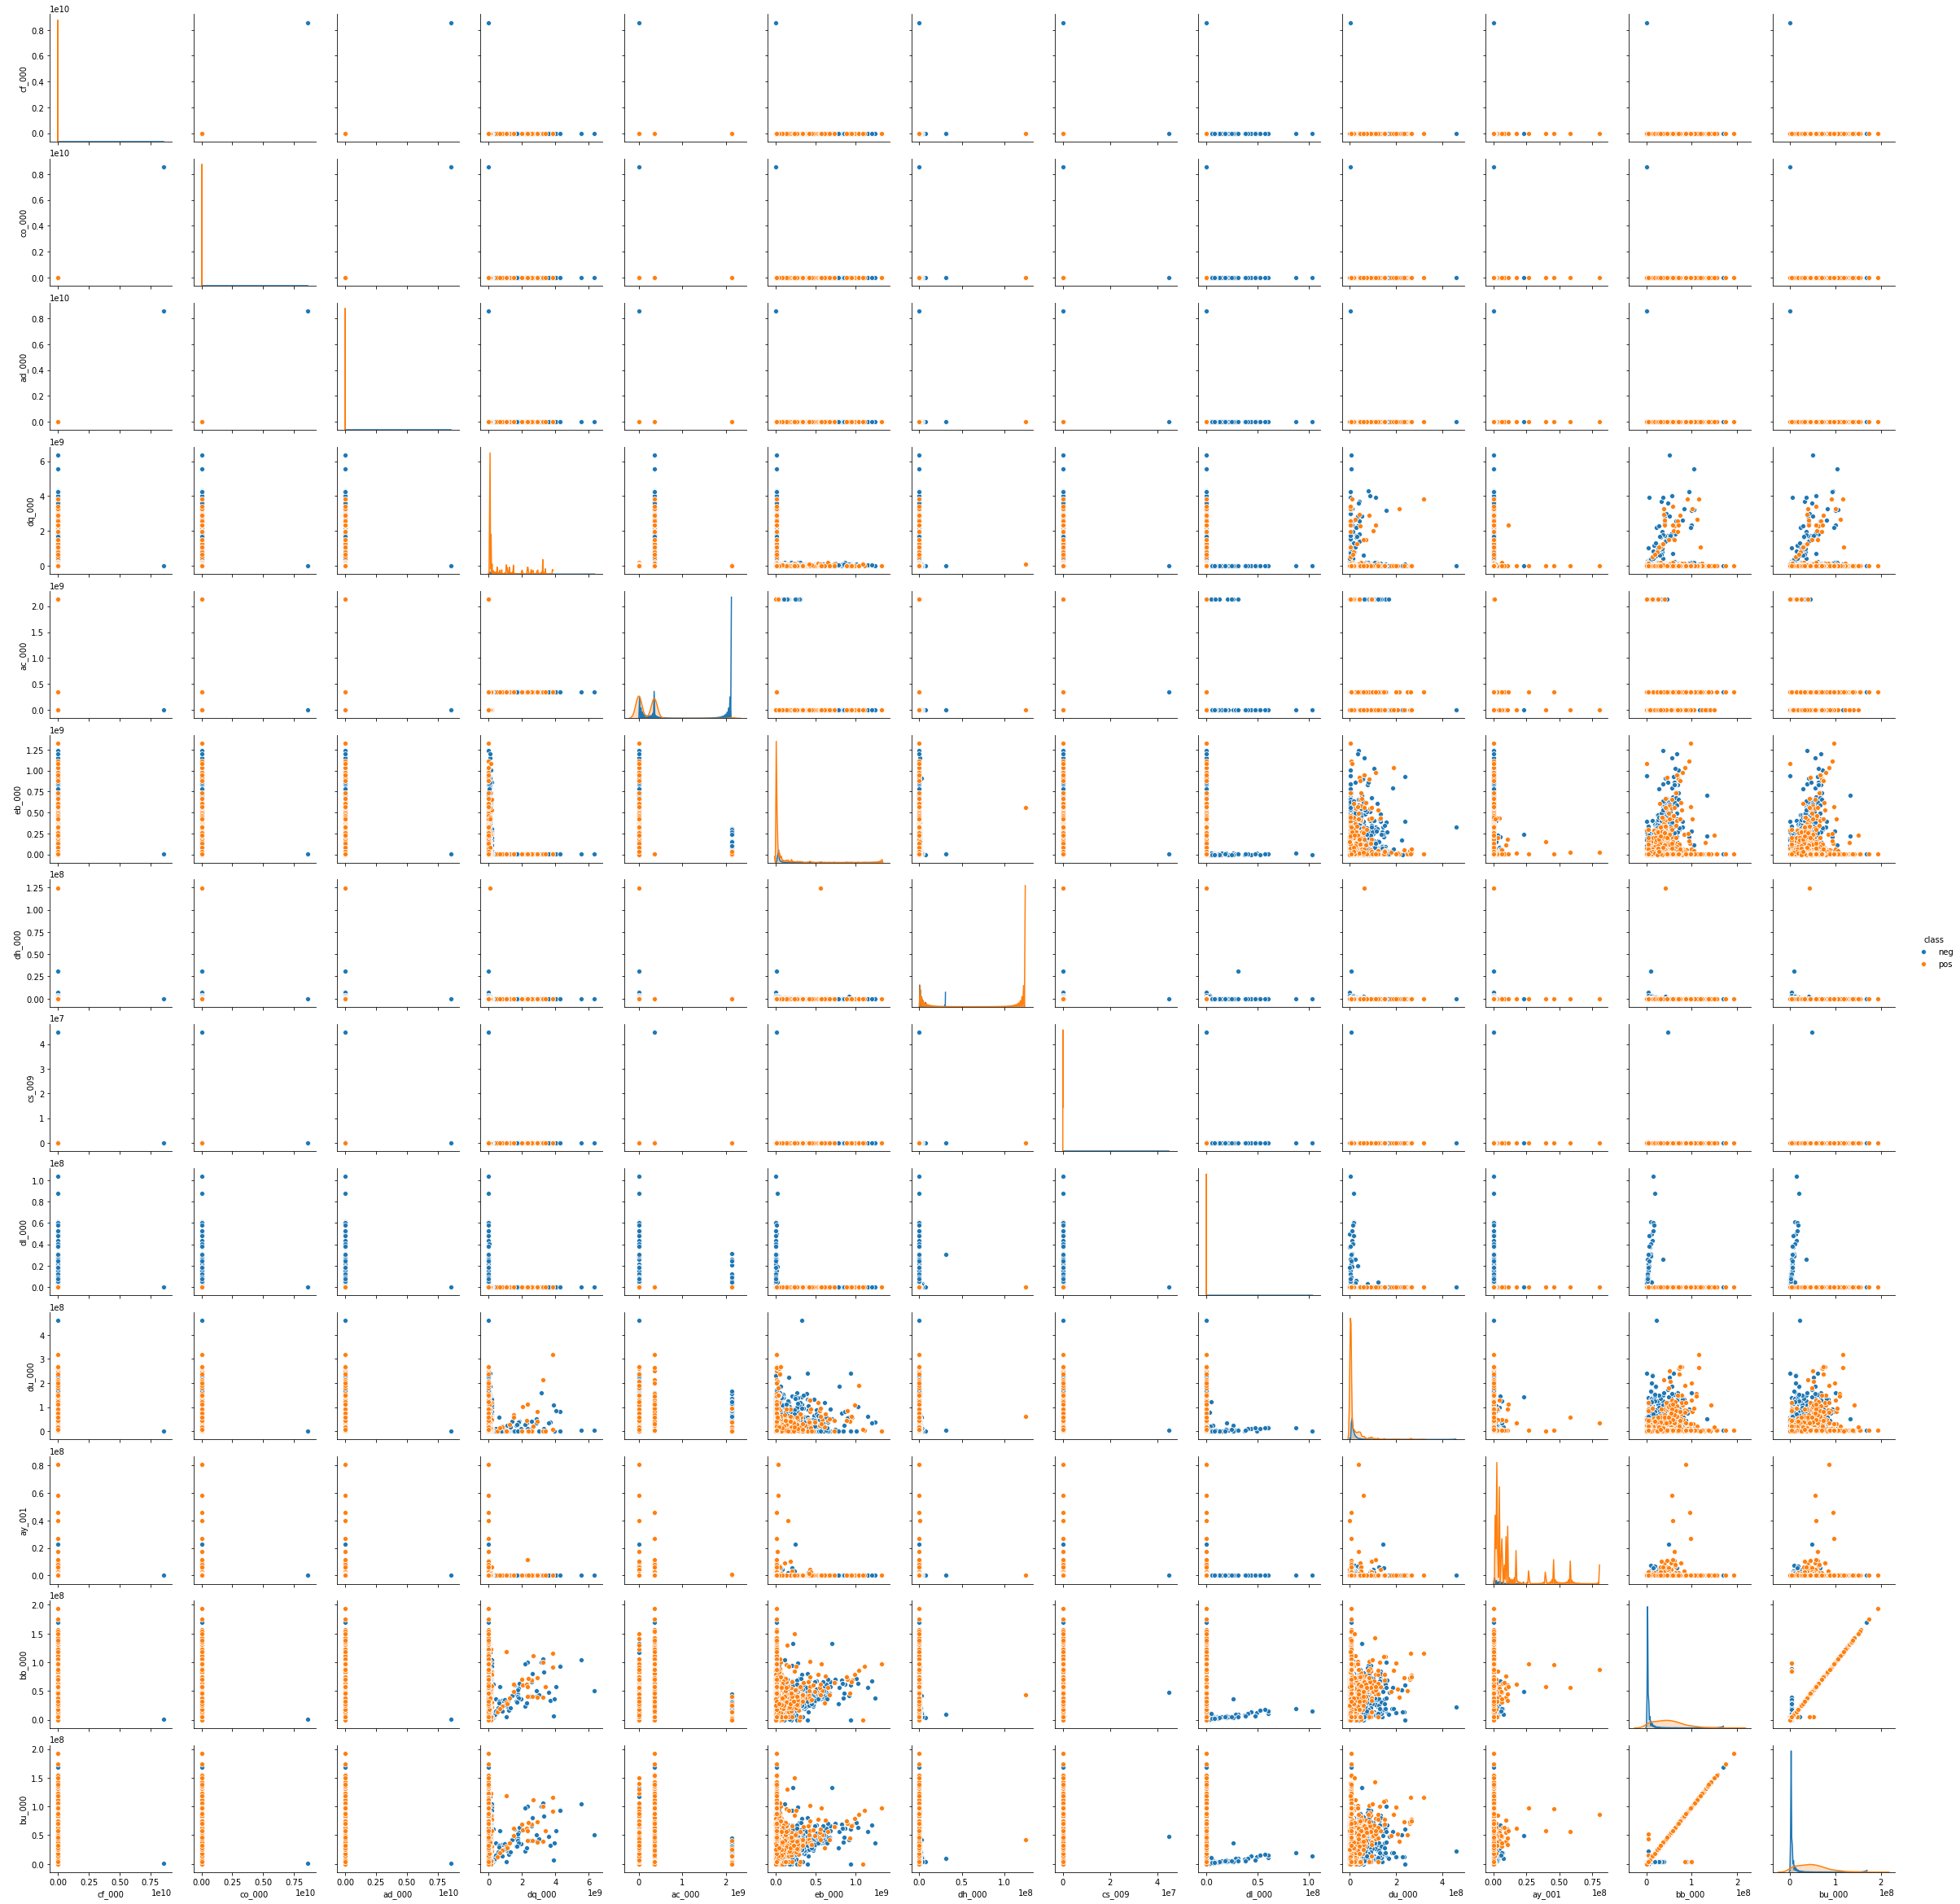

In [157]:
top_CV = CV.sort_values(ascending=False).head(13)
top_CV_index =top_CV.index.values
plot_data = pd.concat([traindata[top_CV_index], train_y2], axis=1)
sns.pairplot(plot_data, hue='class')

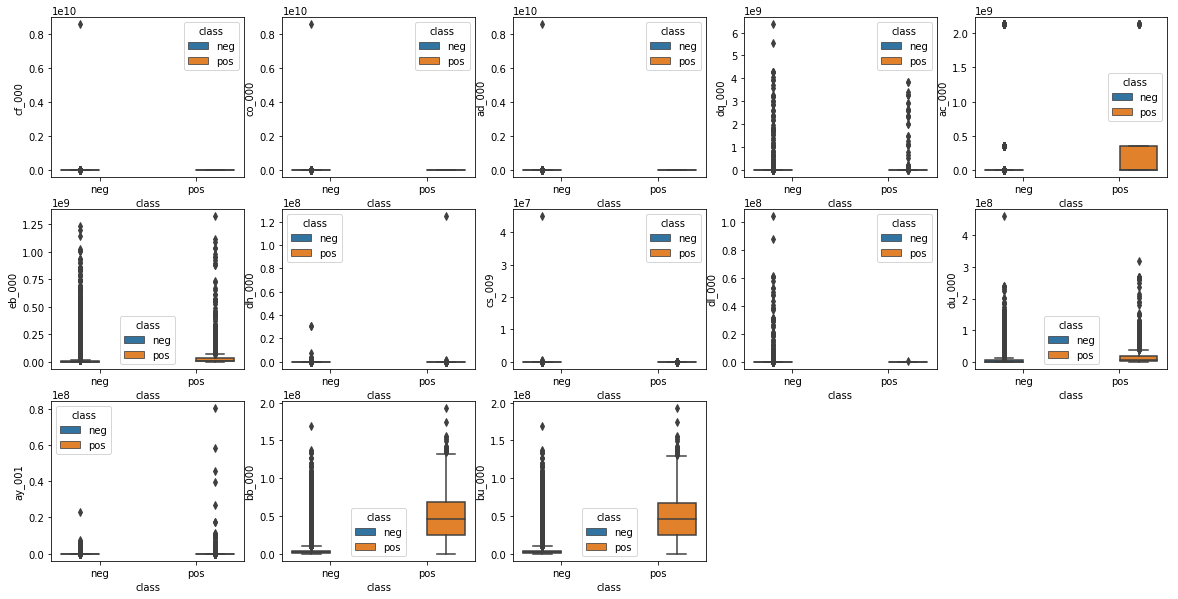

In [164]:
plt.figure(figsize=(20,10))
i = 0
for each in top_CV_index:
    i += 1
    plt.subplot(3,5,i)
    sns.boxplot(x='class', y=each, data= plot_data, hue='class')

The scatter plots only show the relationship between each two features, so we can not draw conclusions about significance.

(b) v. Determine the number of positive and negative data.

In [158]:
traindata['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

Obviously, this dataset is imbalanced.

(c) Train a random forest to classify the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(oob_score=True)
rf.fit(train_x2, train_y2)
rf_pred = rf.predict(train_x2)
print("Train data confusion matrix: ")
print(confusion_matrix(train_y2, rf_pred))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Train data confusion matrix: 
[[58999     1]
 [   40   960]]


Train data AUC:  0.9999916694915254


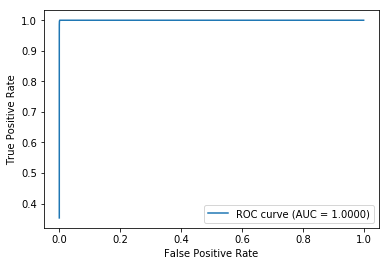

In [257]:
train_y2 = train_y2.replace('pos',1)
train_y2 = train_y2.replace('neg',0)
test_y2 = test_y2.replace('pos',1)
test_y2 = test_y2.replace('neg',0)
auc = metrics.roc_auc_score(train_y2, rf.predict_proba(train_x2)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(train_y2, rf.predict_proba(train_x2)[:,1])
print("Train data AUC: ", auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [258]:
train_mis_rate = 1 - rf.score(train_x2, rf.predict(train_x2))
print('Train data misclassification rate:', train_mis_rate)

Train data misclassification rate: 0.0


In [259]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(train_x2, train_y2)
rf_pred = rf.predict(test_x2)
print("Test data confusion matrix: ")
print(confusion_matrix(test_y2, rf_pred))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Test data confusion matrix: 
[[15608    17]
 [  132   243]]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Test data AUC:  0.975867136


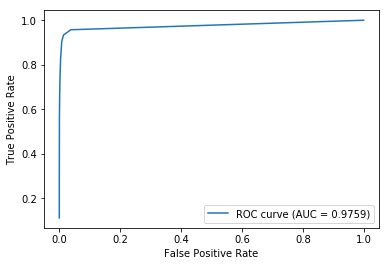

In [260]:
auc = metrics.roc_auc_score(test_y2, rf.predict_proba(test_x2)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(test_y2, rf.predict_proba(test_x2)[:,1])
print("Test data AUC: ", auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [261]:
from sklearn.metrics import accuracy_score
test_mis_rate = 1 - accuracy_score(test_y2, rf.predict(test_x2))
print('Train data misclassification rate:', train_mis_rate)

Train data misclassification rate: 0.0


In [262]:
oob_error = 1 - rf.oob_score_
print("Out of Bag error estimate is: %.4f" % oob_error)

Out of Bag error estimate is: 0.0090


(d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. 

In [263]:
bal_rf = RandomForestClassifier(oob_score=True, class_weight="balanced")
bal_rf.fit(train_x2, train_y2)
bal_rf_pred = bal_rf.predict(train_x2)
print("Train data confusion matrix: ")
print(confusion_matrix(train_y2, bal_rf_pred))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train data confusion matrix: 
[[58998     2]
 [   56   944]]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Train data AUC:  0.9999865508474576


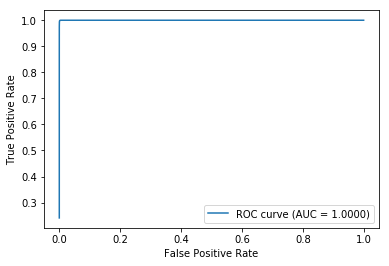

In [264]:
auc = metrics.roc_auc_score(train_y2, bal_rf.predict_proba(train_x2)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(train_y2, bal_rf.predict_proba(train_x2)[:,1])
print("Train data AUC: ", auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [265]:
train_mis_rate = 1 - accuracy_score(train_y2, bal_rf.predict(train_x2))
print('Train data misclassification rate:', train_mis_rate)

Train data misclassification rate: 0.0009666666666666712


In [266]:
bal_rf_pred = bal_rf.predict(test_x2)
print("Test data confusion matrix: ")
print(confusion_matrix(test_y2, bal_rf_pred))

Test data confusion matrix: 
[[15613    12]
 [  187   188]]


Test data AUC:  0.9600963413333333


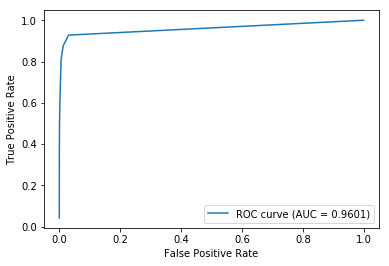

In [267]:
auc = metrics.roc_auc_score(test_y2, bal_rf.predict_proba(test_x2)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(test_y2, bal_rf.predict_proba(test_x2)[:,1])
print("Test data AUC: ", auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [268]:
test_mis_rate = 1 - accuracy_score(test_y2, bal_rf.predict(test_x2))
print('Test data misclassification rate:', test_mis_rate)

Test data misclassification rate: 0.01243749999999999


In [269]:
oob_error = 1 - bal_rf.oob_score_
print("Out of Bag error estimate is: %.4f" % oob_error)

Out of Bag error estimate is: 0.0103


Compared to the test error rate, the Out of Bag error is slightly lower than the test error.

In [270]:
import weka.core.jvm as jvm
import arff
from weka.core.converters import Loader, Saver
from weka.classifiers import Classifier
from weka.classifiers import PredictionOutput, Evaluation

In [271]:
loader = Loader(classname="weka.core.converters.ArffLoader")

AttributeError: 'NoneType' object has no attribute 'find_class'

# 3. ISLR 6.8.3

(a) iv. steadily decrease
    As the s increases, the model is more flexible. Then, the training RSS steadily decreases.
(b) ii. decrease initially, and then eventually start increasing in a U shape.
    The test RSS firstly decreases and than increases because of variance-bias tradeoff.    
(c) iii. steadily increase
    Because the model become more flexible with the increase of s, the model may overfit the data. The variance           increases.
(d) iv. steadily decrease
    The bia will decrease because the model is more flexible, which can fit the data well.
(e) v. remain constant
    Bayes error rate does not depend on the model, just depend on the dataset.

# 4. ISLR 6.8.5

(a) Ridge regression minimizes: $(y_1 - \hat\beta_1x_{11} - \hat\beta_2x_{12})^2 + (y_2 - \hat\beta_1x_{21} - \hat\beta_2x_{22})^2 + \lambda ({\hat\beta_1}^2 + {\hat\beta_2}^2)$

(b) $$\hat\beta_1 = \frac{x_1y_1 + x_2y_2 - \hat{\beta}_2(x_1^2 + x_2^2)}{\lambda + x_1^2 + x_2^2}$$$$\hat\beta_2 = \frac{x_1y_1 + x_2y_2 - \hat{\beta}_1(x_1^2 + x_2^2)}{\lambda + x_1^2 + x_2^2}$$
    $$({\lambda + x_1^2 + x_2^2})\hat\beta_1 = x_1y_1 + x_2y_2 - \frac{x_1y_1 + x_2y_2 - \hat{\beta}_1(x_1^2 + x_2^2)}{\lambda + x_1^2 + x_2^2}(x_1^2 + x_2^2)$$
$$({\lambda + x_1^2 + x_2^2})\hat\beta_2 = x_1y_1 + x_2y_2 - \frac{x_1y_1 + x_2y_2 - \hat{\beta}_2(x_1^2 + x_2^2)}{\lambda + x_1^2 + x_2^2}(x_1^2 + x_2^2)$$
According to the condition X11=X12=X1, X21=X22=X2; $\hat\beta_1 = \hat\beta_2$

(c) Lasso regression minimizes: $(y_1 - \hat\beta_1x_{11} - \hat\beta_2x_{12})^2 + (y_2 - \hat\beta_1x_{21} - \hat\beta_2x_{22})^2 + \lambda (|{\hat\beta_1}| + |{\hat\beta_2}|)$

(d) $$-x_1y_1 - x_2y_2 + \hat{\beta}_1(x_1^2 + x_2^2) + \hat{\beta}_2(x_1^2 + x_2^2) + \lambda \frac{|\hat\beta_1|}{\hat\beta_1} = 0$$$$-x_1y_1 - x_2y_2 + \hat{\beta}_1(x_1^2 + x_2^2) + \hat{\beta}_2(x_1^2 + x_2^2) + \lambda \frac{|\hat\beta_2|}{\hat\beta_2} = 0$$
$$\lambda\frac{|\beta_1|}{\beta_1} = \lambda\frac{|\beta_2|}{\beta_2}$$
So, $\beta_1$ and $\beta_2$ are both positive or both negative.

# 5. ISLR 8.4.5

Majority vote: Red
Because there are 6 probability estimates that are greater than 0.5 and 4 estimates less than 0.5. So the number of red is larger than the number of green.

Average Probability: Green
The average probability of red is 0.45, which is less than 0.5. SO the prediction is green.

# 6. ISLR 9.7.3

Text(0,0.5,'x2')

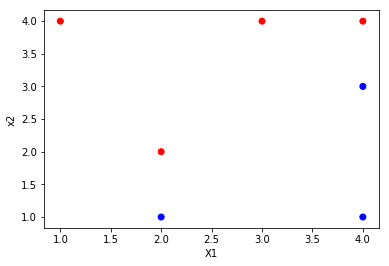

In [228]:
#(a)
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
colors = ["red", "red", "red", "red", "blue", "blue", "blue"]
plt.scatter(x1, x2, color=colors)
plt.xlabel('X1')
plt.ylabel('x2')

(b) The equation for this hyperplane is$$0.5 - X_1 + X_2 = 0$$

(0, 5)

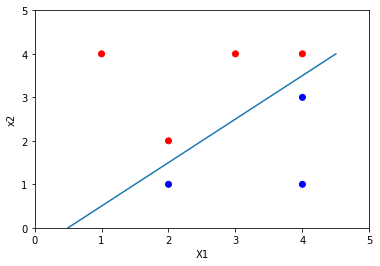

In [232]:
x = np.arange(0.5, 5, 0.5)
y = [1 * i - 0.5 for i in x]
plt.scatter(x1, x2, color=colors)
plt.plot(x, y, '-')
plt.xlabel('X1')
plt.ylabel('x2')
plt.xlim(0, 5)
plt.ylim(0, 5)

(c) $\beta_0=0.5, \beta_1=-1, \beta_2=1$
Classify to Red if $0.5-X_1+X_2 > 0 $, and classify to Blue otherwise.

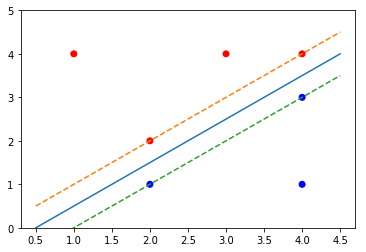

In [233]:
#(d)

y = [1 * i - 0.5 for i in x]
y_upper = [1 * i for i in x]
y_lower = [1 * i - 1 for i in x]
plt.scatter(x1, x2, color=colors)
plt.plot(x, y, '-')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.plot(x, y_upper, '--')
plt.plot(x, y_lower, '--')
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 360x360 with 0 Axes>

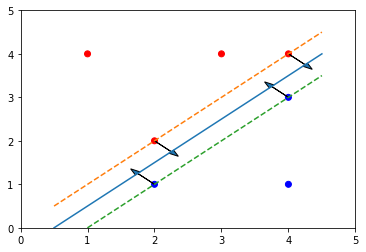

<Figure size 360x360 with 0 Axes>

In [241]:
# (e)
plt.scatter(x1, x2, color=colors)
plt.plot(x, y, '-')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.plot(x, y_upper, '--')
plt.plot(x, y_lower, '--')
ax = plt.axes()
ax.arrow(2, 2, 0.25, -0.25, head_width=0.1)
ax.arrow(4, 4, 0.25, -0.25, head_width=0.1)
ax.arrow(2, 1, -0.25, 0.25, head_width=0.1)
ax.arrow(4, 3, -0.25, 0.25, head_width=0.1)
plt.figure(figsize=(5,5))

(f) The seventh observation is (4, 1), which is outside the margin. Thus, a slight movement of it would not change the maximal margin hyperplane.

(g) The equation for this hyperplane is  $0.7-X_1+X_2 =0$

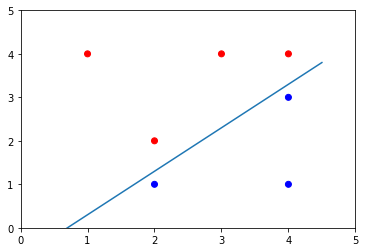

In [243]:
hy = [1 * i - 0.7 for i in x]
plt.scatter(x1, x2, color=colors)
plt.plot(x, hy, '-')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

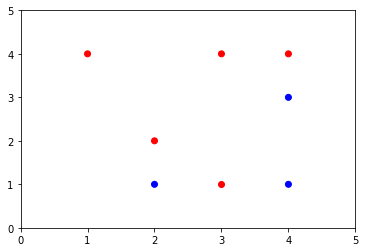

In [242]:
# (h)
plt.scatter(x1, x2, color=colors)
plt.scatter([3], [1], color=['red'])
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()
